# Import libraries

In [1]:
import sys
from itertools import product
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice)
SCRIPT_DIR = Path().resolve().parent
sys.path.append(str(SCRIPT_DIR))

from KuehnEtAl2023 import run_average_displacement

# Run Average Displacement

## Single scenarios

In [3]:
df = run_average_displacement.run_ad(magnitude=7, style="strike-slip")
df

,magnitude,style,model_number,avg_displ
0,7,strike-slip,-1,1.447169


In [4]:
df = run_average_displacement.run_ad(magnitude=7, style="reverse")
df

,magnitude,style,model_number,avg_displ
0,7,reverse,-1,1.550645


In [5]:
df = run_average_displacement.run_ad(magnitude=7, style="normal")
df

,magnitude,style,model_number,avg_displ
0,7,normal,-1,1.465161


## Create magnitude scaling plots

In [6]:
magnitudes = np.arange(5, 8.7, 0.2).tolist()

# Strike-slip calculations
run_results = []
for magnitude in magnitudes:
    results = run_average_displacement.run_ad(magnitude=magnitude, style="strike-slip")
    run_results.append(results)

df_ss = pd.concat(run_results, ignore_index=True)
del run_results, results

# Reverse calculations
run_results = []
for magnitude in magnitudes:
    results = run_average_displacement.run_ad(magnitude=magnitude, style="reverse")
    run_results.append(results)

df_rv = pd.concat(run_results, ignore_index=True)
del run_results, results

# Normal calculations
run_results = []
for magnitude in magnitudes:
    results = run_average_displacement.run_ad(magnitude=magnitude, style="normal")
    run_results.append(results)

df_nm = pd.concat(run_results, ignore_index=True)
del run_results, results

df_ss.to_csv("kea23_ss_ad.csv", index=False)
df_rv.to_csv("kea23_rv_ad.csv", index=False)
df_nm.to_csv("kea23_nm_ad.csv", index=False)

df_ss.head()

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\KuehnEtAl2023\run_displacement_model.py:59: RuntimeWarning: invalid value encountered in power
  D = ((lam * mu + 1) ** (1 / lam)) * (


,magnitude,style,model_number,avg_displ
0,5.0,strike-slip,-1,0.000470
1,5.2,strike-slip,-1,0.002821
2,5.4,strike-slip,-1,0.009747
3,5.6,strike-slip,-1,0.025123
4,5.8,strike-slip,-1,0.054321


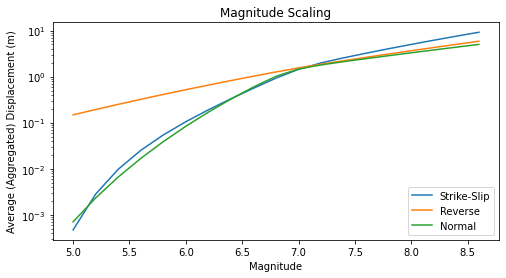

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.semilogy(df_ss["magnitude"], df_ss["avg_displ"], label="Strike-Slip")
ax.semilogy(df_rv["magnitude"], df_rv["avg_displ"], label="Reverse")
ax.semilogy(df_nm["magnitude"], df_nm["avg_displ"], label="Normal")
ax.set(
    xlabel="Magnitude",
    ylabel="Average (Aggregated) Displacement (m)",
    title="Magnitude Scaling",
)
ax.legend(loc="lower right")
plt.savefig("magnitude_scaling_ad.png", bbox_inches="tight")